In [24]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import fastcluster
import scipy
import numpy as np
sns.set_theme()

In [7]:
## process data
d = pd.read_csv('100_drug_distances.tsv', delimiter='\t') # load data
d_m = (d.rename(columns={"Drug": "Drug1"})
    .melt("Drug1", var_name="Drug2", value_name="Distance")
    .sort_values(by="Drug1")
) # melt data
d_p = d_m.pivot('Drug1', 'Drug2', 'Distance') # pivot data

In [8]:
## save pivoted data
d_p.to_csv('100_drug_distances_pivoted.tsv', sep = '\t', index=False)

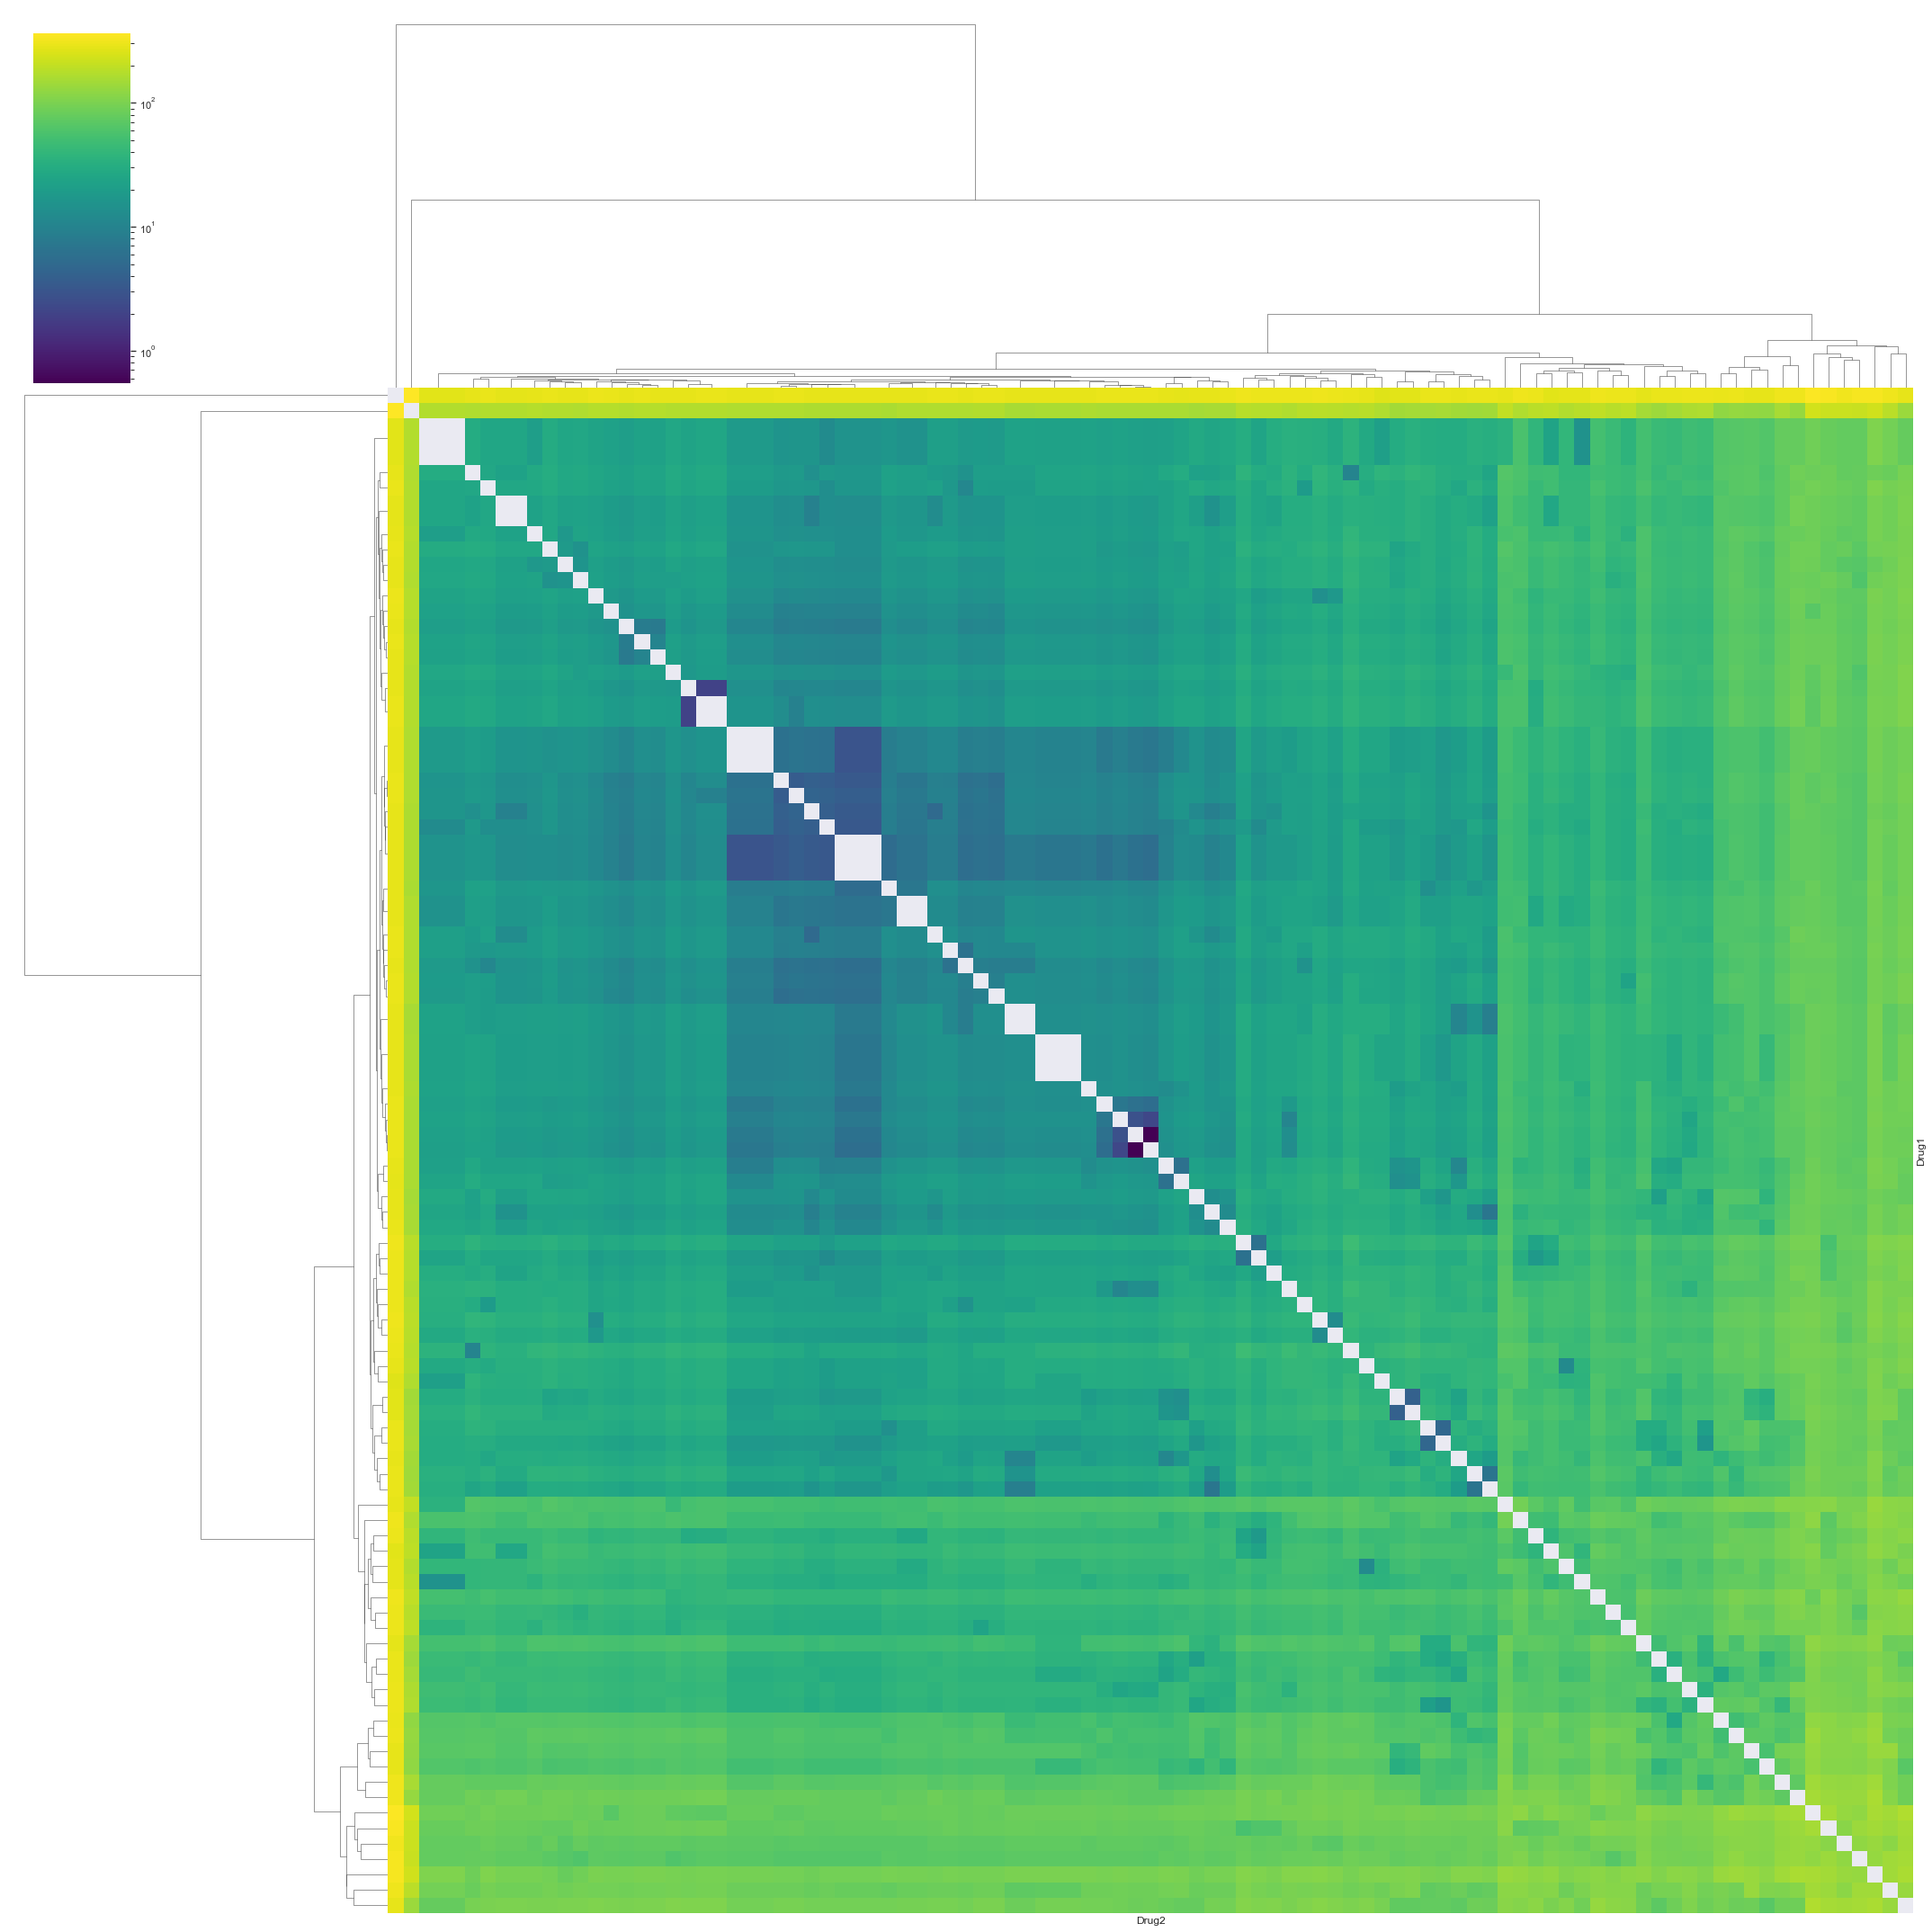

In [70]:
# cluster and plot data
g = sns.clustermap(d_p, figsize=(30,30), norm=LogNorm(), linewidths=0.0, cmap='viridis')
g.savefig('100_drug_clustermap.pdf')

In [33]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = d_p.corr()
correlations_array = np.asarray(d_p.corr())

linkage_matrix = hierarchy.linkage(
    distance.pdist(correlations_array), method='average')

In [67]:
clusters = hierarchy.fcluster(linkage_matrix, t=7, criterion='maxclust')

In [68]:
res = pd.DataFrame()
res['Drug'] = sorted(list(d['Drug']))
res['Cluster'] = clusters
res.to_csv('100_drug_clusters.tsv', sep='\t', index=False)

In [53]:
correlations_array

array([[1.        , 0.99870836, 0.97712414, ..., 0.99752381, 0.99738392,
        0.98938213],
       [0.99870836, 1.        , 0.97719926, ..., 0.99809072, 0.99793553,
        0.98856515],
       [0.97712414, 0.97719926, 1.        , ..., 0.97407087, 0.97374818,
        0.9618262 ],
       ...,
       [0.99752381, 0.99809072, 0.97407087, ..., 1.        , 0.99953666,
        0.99339758],
       [0.99738392, 0.99793553, 0.97374818, ..., 0.99953666, 1.        ,
        0.99324684],
       [0.98938213, 0.98856515, 0.9618262 , ..., 0.99339758, 0.99324684,
        1.        ]])

In [54]:
d_p

Drug2,(2-BENZHYDRYLOXYETHYL)DIETHYL-METHYLAMMONIUM IODIDE,"1-(3,4-DICHLOROPHENYL)-6-(METHOXYMETHYL)-3-AZABICYCLO[4.1.0]HEPTANE (ENANTIOMERIC MIX)",10-1074,1018 ISS,13-DEOXYDOXORUBICIN,14G2A,16.ALPHA.-BROMOEPIANDROSTERONE,18-METHOXYCORONARIDINE,2'-FUCOSYLLACTOSE,2-DEOXY-D-GLUCOSE,...,ACAMPROSATE CALCIUM,ACARBOSE,ACEBILUSTAT,ACEBUTOLOL,ACEBUTOLOL HYDROCHLORIDE,ACECLIDINE,ACECLOFENAC,ACEFYLLINE PIPERAZINE,[18F]-FBA-A20FMDV2,[18F]FLUOROMISONIDAZOLE
Drug1,,,,,,,,,,,,,,,,,,,,,
(2-BENZHYDRYLOXYETHYL)DIETHYL-METHYLAMMONIUM IODIDE,0.000000,3.920475,22.408356,43.223670,3.388820,21.428227,16.162936,24.225655,9.401795,10.475950,...,10.140828,86.759818,24.167030,16.648038,13.940464,8.538046,50.579904,6.168813,9.042089,11.135483
"1-(3,4-DICHLOROPHENYL)-6-(METHOXYMETHYL)-3-AZABICYCLO[4.1.0]HEPTANE (ENANTIOMERIC MIX)",3.920475,0.000000,22.307091,47.144145,3.287555,21.326962,16.061671,24.124390,13.322271,10.374685,...,9.390278,90.680293,28.087505,16.546772,13.839199,8.436781,50.478639,6.067547,8.940824,11.034218
10-1074,22.408356,22.307091,0.000000,37.327895,21.775436,33.495376,6.245421,38.354858,31.810152,28.862566,...,28.527445,109.168174,46.575387,35.034654,32.327080,26.924662,65.261367,24.555429,27.428705,29.522099
1018 ISS,43.223670,47.144145,37.327895,0.000000,43.856590,50.549410,31.082475,63.191913,49.306263,49.647002,...,53.364499,127.470000,67.390701,55.715970,57.164134,51.761717,90.098421,49.392483,52.265759,50.306536
13-DEOXYDOXORUBICIN,3.388820,3.287555,21.775436,43.856590,0.000000,18.039407,15.530016,23.592736,12.790616,7.087129,...,9.507909,90.148638,27.555851,13.259217,13.307544,7.905126,49.946984,5.535893,8.409169,7.746663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACECLIDINE,8.538046,8.436781,26.924662,51.761717,7.905126,25.944533,20.679242,28.741962,17.939842,14.992256,...,14.657135,95.297864,32.705077,21.164344,18.456770,0.000000,55.096210,10.685119,13.558395,15.651789
ACECLOFENAC,50.579904,50.478639,65.261367,90.098421,49.946984,67.986391,59.015946,66.522896,59.981699,57.034113,...,56.698992,133.124101,70.486011,63.206201,56.507438,55.096210,0.000000,52.726976,55.600253,57.693647
ACEFYLLINE PIPERAZINE,6.168813,6.067547,24.555429,49.392483,5.535893,23.575299,18.310008,26.372728,15.570608,12.623022,...,12.287901,92.928630,25.491024,18.795110,16.087536,10.685119,52.726976,0.000000,6.344342,8.437737


In [58]:
set(d['Drug'])

{'(2-BENZHYDRYLOXYETHYL)DIETHYL-METHYLAMMONIUM IODIDE',
 '1-(3,4-DICHLOROPHENYL)-6-(METHOXYMETHYL)-3-AZABICYCLO[4.1.0]HEPTANE (ENANTIOMERIC MIX)',
 '10-1074',
 '1018 ISS',
 '13-DEOXYDOXORUBICIN',
 '14G2A',
 '16.ALPHA.-BROMOEPIANDROSTERONE',
 '18-METHOXYCORONARIDINE',
 "2'-FUCOSYLLACTOSE",
 '2-DEOXY-D-GLUCOSE',
 '2-HYDROXYOLEIC ACID',
 '2-HYDROXYPROPYL-BETA-CYCLODEXTRIN',
 '2-IMINOBIOTIN',
 '2-METHOXYESTRADIOL',
 '2-OCTYL CYANOACRYLATE',
 '2X-121',
 '3,5-DIIODOTHYROPROPIONIC ACID',
 '3F8',
 "4'-THIO-2'-DEOXYCYTIDINE",
 '4-DEMETHYL-4-CHOLESTERYLOXYCARBONYLPENCLOMEDINE',
 '4-IMIDAZOLECARBOXYLIC ACID',
 '4-ISOTHIOUREIDOBUTYRONITRILE',
 '4B5',
 '4G7XH22',
 '4SC-203',
 '552-02',
 '6-O-BENZYLGUANINE',
 '7-ETHYL-10-HYDROXYCAMPTOTHECIN',
 '7-KETO DEHYDROEPIANDROSTERONE',
 '7-METHYLXANTHINE',
 '8-CHLOROADENOSINE',
 '8H9 131I',
 '9-AMINOCAMPTOTHECIN',
 '9-ING-41',
 'A27.15',
 'A33 131I',
 'AB-122',
 'AB-928',
 'ABACAVIR',
 'ABACAVIR HYDROXYACETATE',
 'ABACAVIR SULFATE',
 'ABAGOVOMAB',
 'ABALOPARA

In [62]:
sorted(list(set(d['Drug'])))

['(2-BENZHYDRYLOXYETHYL)DIETHYL-METHYLAMMONIUM IODIDE',
 '1-(3,4-DICHLOROPHENYL)-6-(METHOXYMETHYL)-3-AZABICYCLO[4.1.0]HEPTANE (ENANTIOMERIC MIX)',
 '10-1074',
 '1018 ISS',
 '13-DEOXYDOXORUBICIN',
 '14G2A',
 '16.ALPHA.-BROMOEPIANDROSTERONE',
 '18-METHOXYCORONARIDINE',
 "2'-FUCOSYLLACTOSE",
 '2-DEOXY-D-GLUCOSE',
 '2-HYDROXYOLEIC ACID',
 '2-HYDROXYPROPYL-BETA-CYCLODEXTRIN',
 '2-IMINOBIOTIN',
 '2-METHOXYESTRADIOL',
 '2-OCTYL CYANOACRYLATE',
 '2X-121',
 '3,5-DIIODOTHYROPROPIONIC ACID',
 '3F8',
 "4'-THIO-2'-DEOXYCYTIDINE",
 '4-DEMETHYL-4-CHOLESTERYLOXYCARBONYLPENCLOMEDINE',
 '4-IMIDAZOLECARBOXYLIC ACID',
 '4-ISOTHIOUREIDOBUTYRONITRILE',
 '4B5',
 '4G7XH22',
 '4SC-203',
 '552-02',
 '6-O-BENZYLGUANINE',
 '7-ETHYL-10-HYDROXYCAMPTOTHECIN',
 '7-KETO DEHYDROEPIANDROSTERONE',
 '7-METHYLXANTHINE',
 '8-CHLOROADENOSINE',
 '8H9 131I',
 '9-AMINOCAMPTOTHECIN',
 '9-ING-41',
 'A27.15',
 'A33 131I',
 'AB-122',
 'AB-928',
 'ABACAVIR',
 'ABACAVIR HYDROXYACETATE',
 'ABACAVIR SULFATE',
 'ABAGOVOMAB',
 'ABALOPARA

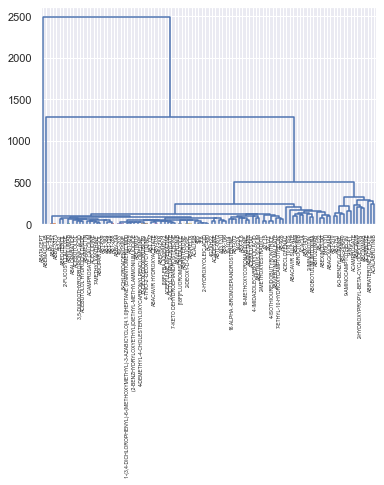

In [27]:
den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
                                         labels = d_p.index,
                                         color_threshold=0.60)

from collections import defaultdict

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

In [31]:
den

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [144.375, 144.375, 193.75, 193.75],
  [103.75, 103.75, 169.0625, 169.0625],
  [80.0, 80.0, 136.40625, 136.40625],
  [60.0, 60.0, 108.203125, 108.203125],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [260.0, 260.0, 284.375, 284.375],
  [232.5, 232.5, 272.1875, 272.1875],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [385.0, 385.0, 395.0, 395.0],
  [375